# <span style="color:darkred">  Esercitazione 12 </span>

### Exercise 12.1

By keeping fixed all the other parameters, try to use at least two other optimizers, different from SGD. Watch to accuracy and loss for training and validation data and comment on the performances.
________________________
##### Svolgimento
Dopo aver provato alcuni degli ottimizzatori sono arrivato a queste conclusioni:

   * **SGD** = loss: 0.15 - acc = 0.95 - prediction 90%
   * **ADAM** = loss: 0.076 - acc = 0.977 - prediction 90%
   * **ADADelta** = loss: 1.4 - acc = 0.75 - prediction 70%
   * **ADAMAX** = loss: 0.076 - acc = 0.977 - prediction 100%
   * **RMSpopr** = loss: 0.17 - acc = 0.977 - prediction 100%
   * **NADAM** = loss: 0.076 - acc = 0.9778 - prediction 100%
   
In seguito è mostrato il risultato per l'ottimizzatore **NADAM**

In [49]:
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt
seed=0
np.random.seed(seed) # fix random seed
tf.random.set_seed(seed)

In [50]:
from tensorflow.keras.datasets import mnist

# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28)
Y_train shape: (60000,)

60000 train samples
10000 test samples


an example of a data point with label 4


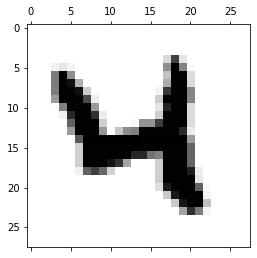

an example of a data point with label 4 before to_categorical ...
... and with label [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] after to_categorical

X_train shape: (60000, 784)
Y_train shape: (60000, 10)


In [51]:
# reshape data, it could depend on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)

# cast floats to single precesion
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255

# look at an example of data point
print('an example of a data point with label', Y_train[20])
# matshow: display a matrix in a new figure window
plt.matshow(X_train[20,:].reshape(28,28),cmap='binary')
plt.show()

print('an example of a data point with label', Y_train[20], 'before to_categorical ...')
# convert class vectors to binary class matrices, e.g. for use with categorical_crossentropy
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)
print('... and with label', Y_train[20], 'after to_categorical')
print()
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)

In [52]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

def create_DNN():
    # instantiate model
    model = Sequential()
    # add a dense all-to-all relu layer
    model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
    # add a dense all-to-all relu layer
    model.add(Dense(100, activation='relu'))
    # apply dropout with rate 0.5
    model.add(Dropout(0.5))
    # soft-max layer
    model.add(Dense(num_classes, activation='softmax'))
    
    return model

print('Model architecture created successfully!')

Model architecture created successfully!


In [53]:
from tensorflow.keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam

def compile_model():
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=Nadam(),
                  metrics=['accuracy'])
    return model

print('Model compiled successfully and ready to be trained.')

Model compiled successfully and ready to be trained.


In [54]:
# training parameters
batch_size = 32
epochs = 5

# create the deep neural net
model_DNN = compile_model()

# train DNN and store training info in history
history = model_DNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 15s 245us/sample - loss: 0.2803 - accuracy: 0.9178 - val_loss: 0.1107 - val_accuracy: 0.9660
Epoch 2/5
60000/60000 [==============================] - 14s 239us/sample - loss: 0.1203 - accuracy: 0.9638 - val_loss: 0.0819 - val_accuracy: 0.9746
Epoch 3/5
60000/60000 [==============================] - 14s 233us/sample - loss: 0.0886 - accuracy: 0.9747 - val_loss: 0.0801 - val_accuracy: 0.9753
Epoch 4/5
60000/60000 [==============================] - 14s 241us/sample - loss: 0.0705 - accuracy: 0.9789 - val_loss: 0.0823 - val_accuracy: 0.9741
Epoch 5/5
60000/60000 [==============================] - 14s 237us/sample - loss: 0.0579 - accuracy: 0.9823 - val_loss: 0.0765 - val_accuracy: 0.9778


10000/10000 [==============================] - 1s 64us/sample - loss: 0.0765 - accuracy: 0.9778

Test loss: 0.07648402467685446
Test accuracy: 0.9778


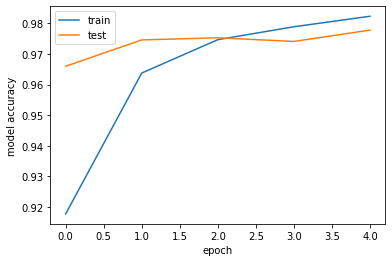

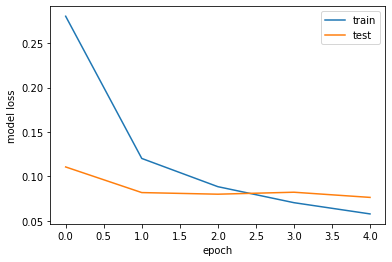

In [55]:
# evaluate model
score = model_DNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

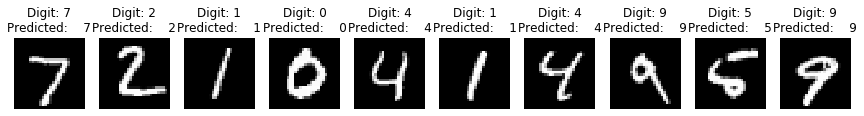

In [56]:
#X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
predictions = model_DNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

### Exercise 12.2

Change the architecture of your DNN using convolutional layers. Use `Conv2D`, `MaxPooling2D`, `Dropout`, but also do not forget `Flatten`, a standard `Dense` layer and `soft-max` in the end. 

___________________________________________
##### Svolgimento

Per il seguente esercizio sono andato a costruire la rete neurale convoluzionale nel seguente modo:
  1. Layer Input Conv2D con 10 neuroni e kernel_size = 5x5 con funzione-attivazione relu
  2. Hidden Layer MaxPooling2D che eseguiva un pooling 4x4
  3. Hidden Layer Conv2D con 20 neuroni e kernel_size = 3x3 con funzione-attivazione relu
  4. Hidden Layer MaxPooling2D che eseguiva un pooling 2x2
  5. Hidden Layer Flatten
  6. Output Layer Dense di 10 neuroni (= 10 numeri di output) con funzione-attivazione soft-max
  
Come ottimizzatore per il fit ho usato anche in questo caso il **NADAM**

In [127]:
# you will need the following for Convolutional Neural Networks
from tensorflow.keras.layers import Flatten, Conv2D, MaxPooling2D

# reshape data, depending on Keras backend
if keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28, 1)
Y_train shape: (60000, 10)

60000 train samples
10000 test samples


In [128]:
def create_CNN():
    # instantiate model
    model = Sequential()
    # add first convolutional layer with 10 filters (dimensionality of output space)
    model.add(Conv2D(10, kernel_size=(5, 5), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(4, 4)))
    model.add(Conv2D(20, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(10,activation = 'softmax' ))
    
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer='NADAM',
                  metrics=['accuracy'])
    return model

In [129]:
# training parameters
batch_size = 32
epochs = 10

# create the deep conv net
model_CNN=create_CNN()

# train CNN
model_CNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

# evaliate model
score = model_CNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 48s 801us/sample - loss: 0.3389 - accuracy: 0.9025 - val_loss: 0.1151 - val_accuracy: 0.9666
Epoch 2/10
60000/60000 [==============================] - 51s 850us/sample - loss: 0.1090 - accuracy: 0.9663 - val_loss: 0.0838 - val_accuracy: 0.9724
Epoch 3/10
60000/60000 [==============================] - 51s 851us/sample - loss: 0.0826 - accuracy: 0.9740 - val_loss: 0.0641 - val_accuracy: 0.9777
Epoch 4/10
60000/60000 [==============================] - 53s 884us/sample - loss: 0.0690 - accuracy: 0.9790 - val_loss: 0.0610 - val_accuracy: 0.9799
Epoch 5/10
60000/60000 [==============================] - 43s 721us/sample - loss: 0.0597 - accuracy: 0.9817 - val_loss: 0.0584 - val_accuracy: 0.9810
Epoch 6/10
60000/60000 [==============================] - 47s 778us/sample - loss: 0.0527 - accuracy: 0.9837 - val_loss: 0.0541 - val_accuracy: 0.9822
Epoch 7/10
60000/60000 [====================

10000/10000 [==============================] - 3s 276us/sample - loss: 0.0425 - accuracy: 0.9880

Test loss: 0.04247803966711508
Test accuracy: 0.988


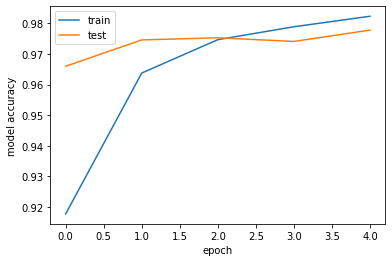

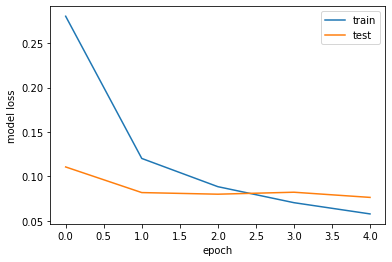

In [130]:
# evaluate model
score = model_CNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

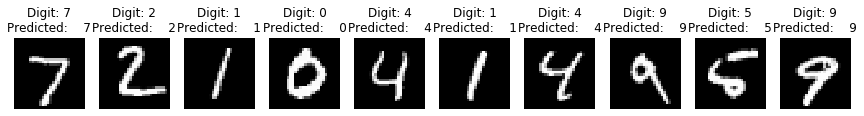

In [131]:
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
predictions = model_DNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

La rete neurale riesce a predirre al 100% i numeri ricevuti in input e presi dalla libreria **mnist** di Keras.
________________________
### Exercise 12.3

Use the `gimp` application to create 10 pictures of your "handwritten" digits, import them in your jupyter-notebook and try to see if your CNN is able to recognize your handwritten digits.

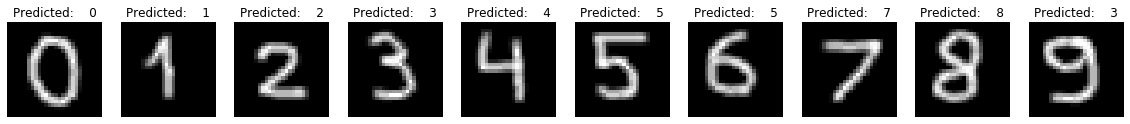

In [132]:
from PIL import Image
import os


### carico tutti i numeri disegnati da me
digit_filename = "./00.png"
digit_in = Image.open(digit_filename).convert('L')

ydim, xdim = digit_in.size
pix=digit_in.load();
data = np.zeros((xdim, ydim))
for j in range(ydim):
    for i in range(xdim):
        data[i,j]=pix[j,i]

data /= 255

data = data.reshape(1,xdim*ydim)
pred_0 = model_DNN.predict(data)

data = data.reshape(xdim,ydim)

plt.figure(1, figsize=(20, 10))
plt.subplot(1,10,1)
plt.imshow(data, cmap='gray')    
plt.title("Predicted:    {}".format(np.argmax(pred_0)))
plt.axis('off') 

digit_filename = "./01.png"
digit_in = Image.open(digit_filename).convert('L')

ydim, xdim = digit_in.size
pix=digit_in.load();
data = np.zeros((xdim, ydim))
for j in range(ydim):
    for i in range(xdim):
        data[i,j]=pix[j,i]

data /= 255

data = data.reshape(1,xdim*ydim)
pred_0 = model_DNN.predict(data)

data = data.reshape(xdim,ydim)

plt.subplot(1,10,2)  
plt.imshow(data, cmap='gray')    
plt.title("Predicted:    {}".format(np.argmax(pred_0)))
plt.axis('off') 

digit_filename = "./02.png"
digit_in = Image.open(digit_filename).convert('L')

ydim, xdim = digit_in.size
pix=digit_in.load();
data = np.zeros((xdim, ydim))
for j in range(ydim):
    for i in range(xdim):
        data[i,j]=pix[j,i]

data /= 255

data = data.reshape(1,xdim*ydim)
pred_0 = model_DNN.predict(data)

data = data.reshape(xdim,ydim)

plt.subplot(1,10,3)
plt.imshow(data, cmap='gray')    
plt.title("Predicted:    {}".format(np.argmax(pred_0)))
plt.axis('off') 

digit_filename = "./03.png"
digit_in = Image.open(digit_filename).convert('L')

ydim, xdim = digit_in.size
pix=digit_in.load();
data = np.zeros((xdim, ydim))
for j in range(ydim):
    for i in range(xdim):
        data[i,j]=pix[j,i]

data /= 255

data = data.reshape(1,xdim*ydim)
pred_0 = model_DNN.predict(data)

data = data.reshape(xdim,ydim)

plt.subplot(1,10,4)  
plt.imshow(data, cmap='gray')    
plt.title("Predicted:    {}".format(np.argmax(pred_0)))
plt.axis('off') 

digit_filename = "./04.png"
digit_in = Image.open(digit_filename).convert('L')

ydim, xdim = digit_in.size
pix=digit_in.load();
data = np.zeros((xdim, ydim))
for j in range(ydim):
    for i in range(xdim):
        data[i,j]=pix[j,i]

data /= 255

data = data.reshape(1,xdim*ydim)
pred_0 = model_DNN.predict(data)

data = data.reshape(xdim,ydim)

plt.subplot(1,10,5)
plt.imshow(data, cmap='gray')    
plt.title("Predicted:    {}".format(np.argmax(pred_0)))
plt.axis('off') 

digit_filename = "./05.png"
digit_in = Image.open(digit_filename).convert('L')

ydim, xdim = digit_in.size
pix=digit_in.load();
data = np.zeros((xdim, ydim))
for j in range(ydim):
    for i in range(xdim):
        data[i,j]=pix[j,i]

data /= 255

data = data.reshape(1,xdim*ydim)
pred_0 = model_DNN.predict(data)

data = data.reshape(xdim,ydim)

plt.subplot(1,10,6)  
plt.imshow(data, cmap='gray')    
plt.title("Predicted:    {}".format(np.argmax(pred_0)))
plt.axis('off') 

digit_filename = "./06.png"
digit_in = Image.open(digit_filename).convert('L')

ydim, xdim = digit_in.size
pix=digit_in.load();
data = np.zeros((xdim, ydim))
for j in range(ydim):
    for i in range(xdim):
        data[i,j]=pix[j,i]

data /= 255

data = data.reshape(1,xdim*ydim)
pred_0 = model_DNN.predict(data)

data = data.reshape(xdim,ydim)

plt.subplot(1,10,7)
plt.imshow(data, cmap='gray')    
plt.title("Predicted:    {}".format(np.argmax(pred_0)))
plt.axis('off') 

digit_filename = "./07.png"
digit_in = Image.open(digit_filename).convert('L')

ydim, xdim = digit_in.size
pix=digit_in.load();
data = np.zeros((xdim, ydim))
for j in range(ydim):
    for i in range(xdim):
        data[i,j]=pix[j,i]

data /= 255

data = data.reshape(1,xdim*ydim)
pred_0 = model_DNN.predict(data)

data = data.reshape(xdim,ydim)

plt.subplot(1,10,8)  
plt.imshow(data, cmap='gray')    
plt.title("Predicted:    {}".format(np.argmax(pred_0)))
plt.axis('off') 

digit_filename = "./08.png"
digit_in = Image.open(digit_filename).convert('L')

ydim, xdim = digit_in.size
pix=digit_in.load();
data = np.zeros((xdim, ydim))
for j in range(ydim):
    for i in range(xdim):
        data[i,j]=pix[j,i]

data /= 255

data = data.reshape(1,xdim*ydim)
pred_0 = model_DNN.predict(data)

data = data.reshape(xdim,ydim)

plt.subplot(1,10,9)
plt.imshow(data, cmap='gray')    
plt.title("Predicted:    {}".format(np.argmax(pred_0)))
plt.axis('off') 

digit_filename = "./09.png"
digit_in = Image.open(digit_filename).convert('L')

ydim, xdim = digit_in.size
pix=digit_in.load();
data = np.zeros((xdim, ydim))
for j in range(ydim):
    for i in range(xdim):
        data[i,j]=pix[j,i]

data /= 255

data = data.reshape(1,xdim*ydim)
pred_0 = model_DNN.predict(data)

data = data.reshape(xdim,ydim)

plt.subplot(1,10,10)  
plt.imshow(data, cmap='gray')    
plt.title("Predicted:    {}".format(np.argmax(pred_0)))
plt.axis('off') 
plt.show()

Se sui dati caricati ho una percentuale di Predited del 100%, sui numeri da me disegnati la percentuale è del 80%. La rete non riesce a riconoscere il 9 e il 6.

Ho provato a disegnare altri 6 e 9, per vedere cosa succedesse.

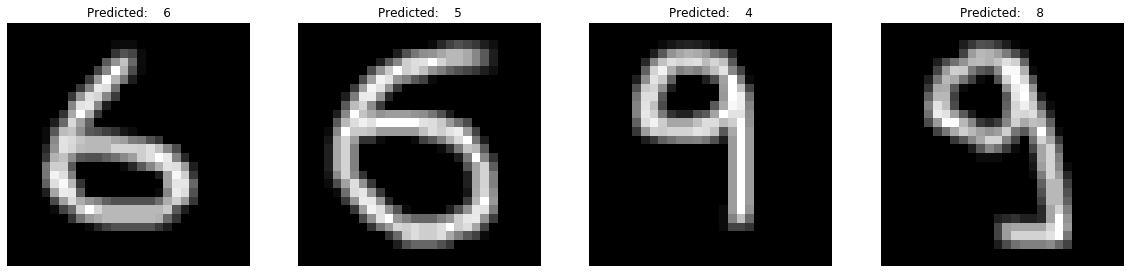

In [133]:
digit_filename = "./06a.png"
digit_in = Image.open(digit_filename).convert('L')

ydim, xdim = digit_in.size
pix=digit_in.load();
data = np.zeros((xdim, ydim))
for j in range(ydim):
    for i in range(xdim):
        data[i,j]=pix[j,i]

data /= 255

data = data.reshape(1,xdim*ydim)
pred_0 = model_DNN.predict(data)

data = data.reshape(xdim,ydim)

plt.figure(1, figsize=(20, 10))
plt.subplot(1,4,1)
plt.imshow(data, cmap='gray')    
plt.title("Predicted:    {}".format(np.argmax(pred_0)))
plt.axis('off') 

digit_filename = "./06b.png"
digit_in = Image.open(digit_filename).convert('L')

ydim, xdim = digit_in.size
pix=digit_in.load();
data = np.zeros((xdim, ydim))
for j in range(ydim):
    for i in range(xdim):
        data[i,j]=pix[j,i]

data /= 255

data = data.reshape(1,xdim*ydim)
pred_0 = model_DNN.predict(data)

data = data.reshape(xdim,ydim)

plt.subplot(1,4,2)  
plt.imshow(data, cmap='gray')    
plt.title("Predicted:    {}".format(np.argmax(pred_0)))
plt.axis('off') 

digit_filename = "./09a.png"
digit_in = Image.open(digit_filename).convert('L')

ydim, xdim = digit_in.size
pix=digit_in.load();
data = np.zeros((xdim, ydim))
for j in range(ydim):
    for i in range(xdim):
        data[i,j]=pix[j,i]

data /= 255

data = data.reshape(1,xdim*ydim)
pred_0 = model_DNN.predict(data)

data = data.reshape(xdim,ydim)

plt.subplot(1,4,3)
plt.imshow(data, cmap='gray')    
plt.title("Predicted:    {}".format(np.argmax(pred_0)))
plt.axis('off') 

digit_filename = "./09b.png"
digit_in = Image.open(digit_filename).convert('L')

ydim, xdim = digit_in.size
pix=digit_in.load();
data = np.zeros((xdim, ydim))
for j in range(ydim):
    for i in range(xdim):
        data[i,j]=pix[j,i]

data /= 255

data = data.reshape(1,xdim*ydim)
pred_0 = model_DNN.predict(data)

data = data.reshape(xdim,ydim)

plt.subplot(1,4,4)  
plt.imshow(data, cmap='gray')    
plt.title("Predicted:    {}".format(np.argmax(pred_0)))
plt.axis('off') 
plt.show()

Il 6 riesce a trovarlo se la linguetta è corta, sennò predice il 5. 
Per quanto riguarda il 9 non riesce mai a distinguerlo.